In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import IsolationForest

In [31]:
df=pd.read_csv('/content/data.csv')
df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,7.76,17,69.73,49096.383004,0.0,0.00,0.0,0.0,0.0,0.0,...,6030,60,70,60.30,1.714466,60.30,0.000021,100,2.939394,DOS-UDP_FLOOD
1,7.92,17,63.36,17895.315300,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000056,100,0.000000,DDOS-UDP_FLOOD
2,0.00,1,64.00,41169.061641,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000024,100,0.000000,DDOS-ICMP_FLOOD
3,20.00,6,64.00,16675.163996,0.0,0.00,0.0,1.0,1.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000060,100,0.000000,DDOS-PSHACK_FLOOD
4,20.00,6,64.00,29516.565799,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000034,100,0.000000,DOS-TCP_FLOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428156,20.00,6,64.00,33267.005076,0.0,1.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000030,100,0.000000,DDOS-SYN_FLOOD
428157,20.00,6,64.00,8280.792087,0.0,1.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000121,100,0.000000,DDOS-SYN_FLOOD
428158,20.00,6,64.00,31939.567469,0.0,0.00,0.0,0.0,0.0,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000033,100,0.000000,DDOS-TCP_FLOOD
428159,8.24,17,65.55,3334.661589,0.0,0.01,0.0,0.0,0.0,0.0,...,6075,60,90,60.75,3.934758,60.75,0.000300,100,15.482323,DDOS-UDP_FLOOD


In [32]:

df['Label_Type'] = df['Label'].apply(lambda x: 'normal' if x == 'BENIGN' else 'anomaly')

df = df[features]
df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,psh_flag_number,ack_flag_number,syn_count,fin_count,...,HTTPS,TCP,UDP,ICMP,Tot sum,Min,Max,IAT,Variance,Label_Type
0,7.76,17,69.73,49096.383004,0.0,0.00,0.0,0.0,0,0,...,0.0,0.00,0.97,0.03,6030,60,70,0.000021,2.939394,anomaly
1,7.92,17,63.36,17895.315300,0.0,0.00,0.0,0.0,0,0,...,0.0,0.00,0.99,0.00,6000,60,60,0.000056,0.000000,anomaly
2,0.00,1,64.00,41169.061641,0.0,0.00,0.0,0.0,0,0,...,0.0,0.00,0.00,1.00,6000,60,60,0.000024,0.000000,anomaly
3,20.00,6,64.00,16675.163996,0.0,0.00,1.0,1.0,0,0,...,0.0,1.00,0.00,0.00,6000,60,60,0.000060,0.000000,anomaly
4,20.00,6,64.00,29516.565799,0.0,0.00,0.0,0.0,0,0,...,0.0,1.00,0.00,0.00,6000,60,60,0.000034,0.000000,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428156,20.00,6,64.00,33267.005076,0.0,1.00,0.0,0.0,100,0,...,0.0,1.00,0.00,0.00,6000,60,60,0.000030,0.000000,anomaly
428157,20.00,6,64.00,8280.792087,0.0,1.00,0.0,0.0,100,0,...,0.0,1.00,0.00,0.00,6000,60,60,0.000121,0.000000,anomaly
428158,20.00,6,64.00,31939.567469,0.0,0.00,0.0,0.0,0,0,...,0.0,1.00,0.00,0.00,6000,60,60,0.000033,0.000000,anomaly
428159,8.24,17,65.55,3334.661589,0.0,0.01,0.0,0.0,1,0,...,0.0,0.01,0.98,0.01,6075,60,90,0.000300,15.482323,anomaly


In [57]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Label_Type'], axis=1)
y = df['Label_Type']
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

isolation = IsolationForest(n_estimators=100,contamination=0.06, random_state=42)
isolation.fit(X_train)

y_pred_iso = isolation.predict(X_test)
y_pred_iso = ['anomaly' if x==1 else 'normal' for x in y_pred_iso]
print(f1_score(y_test, y_pred_iso, average='micro'))
print(precision_score(y_test, y_pred_iso, average="macro"))
print(recall_score(y_test, y_pred_iso, average="macro"))
print(classification_report(y_test,y_pred_iso))

0.9651419429425572
0.6928152986732136
0.8973286223763259
              precision    recall  f1-score   support

     anomaly       1.00      0.97      0.98     83597
      normal       0.39      0.83      0.53      2036

    accuracy                           0.97     85633
   macro avg       0.69      0.90      0.76     85633
weighted avg       0.98      0.97      0.97     85633



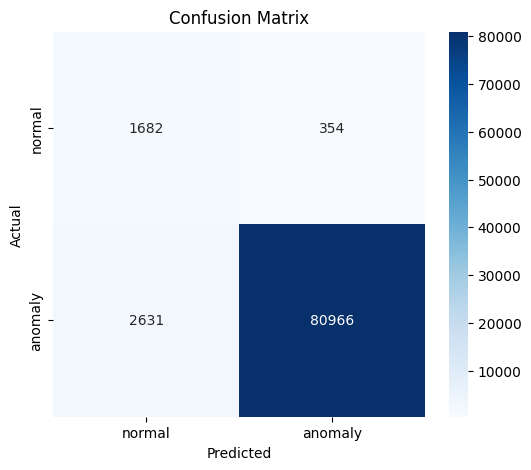

In [58]:
cm = confusion_matrix(y_test, y_pred_iso, labels=['normal', 'anomaly'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'anomaly'], yticklabels=['normal', 'anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()